<a href="https://colab.research.google.com/github/ChanifRusydi/pembelajaran-mesin-lanjut/blob/main/Tugas2/Tugas2_PML20241201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Walk Case
**Grup 1**
1. Endang Rusiana<br>
2. Muchammad 'Irfan Chanif Rusydi<br>
3. Dimas Maulana<br>

![Image Description](https://github.com/ChanifRusydi/pembelajaran-mesin-lanjut/blob/main/Tugas2/random_walk.png?raw=true)

**Library**

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(69)

# Random Walk Environment

**Penjelasan Model**<br>
**A. State (Keadaan):**
1. Diagram menunjukkan 7 keadaan yang direpresentasikan dengan angka 0 sampai 6.
2. Keadaan 0 dan 6 adalah terminal states:
  * Keadaan 0 memberikan reward 0.
  * Keadaan 6 memberikan reward +1.
Keadaan 1 hingga 5 adalah non-terminal states yang memungkinkan transisi antar mereka.


**B. Transition (Transisi):**
1. Dari setiap keadaan, agen dapat berpindah ke kiri atau ke kanan dengan probabilitas yang sama, yaitu 0.5 (transisi acak).
2. Misalnya, jika berada di state 3, maka:
  * Probabilitas bergerak ke state 2 adalah 0.5.
  * Probabilitas bergerak ke state 4 adalah 0.5.


**C. Reward (Penghargaan):**
1. Hanya keadaan terminal (0 dan 6) yang memberikan reward:
  * Reward +1 diberikan ketika mencapai state 6.
  * Reward 0 diberikan ketika mencapai state 0.
2. Tidak ada reward untuk transisi antar state non-terminal.


**D. Tujuan:**
1. Agen dimulai dari salah satu state non-terminal (biasanya 3) dan bertujuan untuk mencapai terminal state.
2. Fokus utama dari kasus ini biasanya adalah mengevaluasi kebijakan atau mempelajari nilai fungsi dari masing-masing state.
**E. Transition Function Acak:**
1. Semua transisi antar state non-terminal bersifat acak (tidak terpengaruh oleh kebijakan atau aksi tertentu). Hal ini membuat random walk menjadi sederhana untuk analisis.

In [4]:
class RandomWalkEnv:
    def __init__(self):
        self.states = [0, 1, 2, 3, 4, 5, 6]  # States 0 and 6 are terminal
        self.terminal_states = [0, 6]
        self.reward_terminal = {0: 0, 6: 1}  # Reward for terminal states
        self.current_state = None

    def reset(self):
        """Reset to the middle state."""
        self.current_state = 3
        return self.current_state

    def step(self):
        """Move randomly left or right."""
        if self.current_state in self.terminal_states:
            return self.current_state, 0, True  # State, Reward, Done

        # Randomly transition (50% chance left, 50% right)
        next_state = self.current_state + np.random.choice([-1, 1])
        reward = self.reward_terminal.get(next_state, 0)
        done = next_state in self.terminal_states
        self.current_state = next_state
        return next_state, reward, done

# Monte Carlo First-Visit

## Langkah-Langkah
### 1. Inisialisasi
- **Inisialisasi Fungsi Nilai**:
  - Semua state $V(s)$ diinisialisasi dengan nilai awal $0$:
$V(s) = 0, \quad \forall s \in \{0, 1, 2, 3, 4, 5, 6\}$
- **Parameter Pembelajaran**:
  - _Learning rate_ awal $\alpha = 0.5$.
  - List kosong untuk menyimpan **return** setiap state:
$\text{returns} = \{ s: [] \, \text{untuk setiap } s \}$

### 2. Generasi Episode
- Untuk setiap episode:
  1. Reset environment ke state awal ($ S_0 $).
  2. Hasilkan urutan state dan reward:
$(S_0, R_1), (S_1, R_2), \dots, (S_T, R_{T+1})$
di mana $S_T$ adalah terminal state.

### 3. Hitung Total Return $G_t $
- Mulai dari akhir episode $( t = T $) hingga awal episode ($ t = 0 $):
$G_t = R_{t+1} + G_{t+1}$
- Untuk setiap state $ S_t $, catat total return $G_t$.

### 4. Pembaruan Fungsi Nilai $ V(s) $
- Untuk setiap **state** $S_t$ dalam episode:
  - Jika $S_t$ adalah kunjungan pertama (first visit) di episode tersebut:
    1. Tambahkan total return $G_t$ ke daftar return  $\text{returns}[S_t]$.
    2. Perbarui fungsi nilai menggunakan:
$V(S_t) \gets V(S_t) + \alpha \cdot (G_t - V(S_t))$       
    3. Hitung _learning rate_ $\alpha $ adaptif:
     $\alpha = \max\left(\alpha_0 \cdot \left(\frac{0.001}{\alpha_0}\right)^{\text{episode} / 250}, 0.001\right)$

### 5. Rekam Sejarah Fungsi Nilai
- Simpan salinan $V(s)$ setelah setiap episode untuk visualisasi konvergensi.

### 6. Hentikan Proses
- Ulangi langkah-langkah di atas hingga mencapai jumlah episode yang diinginkan.

In [ ]:
def monte_carlo_first_visit(env:RandomWalkEnv, episodes:int = 500):
    """
    Monte Carlo First-Visit Prediction
    Args:
        env: RandomWalkEnv
        episodes: Number of episodes to run
    Returns:
        V: State-value function
        V_history: Value function history for visualization
    """
    # Initialize state-value function
    V = np.zeros(7)  # 7 states including terminals
    returns = {state: [] for state in range(7)}  # To store returns for each state
    alpha = 0.5  # Initial learning rate

    # Record value functions for visualization
    V_history = []

    for episode in range(episodes):
        state = env.reset()
        trajectory = []
        done = False

        # Generate an episode
        while not done:
            next_state, reward, done = env.step()
            trajectory.append((state, reward))
            state = next_state

        # Process the episode
        G = 0
        visited_states = set()
        for t in range(len(trajectory) - 1, -1, -1):
            state, reward = trajectory[t]
            G = reward + G  # Calculate return

            # Only update for first visit
            if state not in visited_states:
                visited_states.add(state)
                returns[state].append(G)
                # Update value function with learning rate
                lr = max(alpha * (0.001 / alpha) ** (episode / 250), 0.001)
                V[state] += lr * (G - V[state])

        V_history.append(V.copy())  # Record value function for visualization

    return V, V_history

# Monte Carlo Every-Visit

## Langkah-Langkah
### 1. Inisialisasi
- **Inisialisasi Fungsi Nilai**:
  - Semua state $V(s)$ diinisialisasi dengan nilai awal $0$:
$V(s) = 0, \quad \forall s \in \{0, 1, 2, 3, 4, 5, 6\}$
- **Parameter Pembelajaran**:
  - _Learning rate_ awal $\alpha = 0.5$.
  - List kosong untuk menyimpan **return** setiap state:
$\text{returns} = \{ s: [] \, \text{untuk setiap } s \}$

### 2. Generasi Episode
- Untuk setiap episode:
  1. Reset environment ke state awal ($ S_0 $).
  2. Hasilkan urutan state dan reward:
$(S_0, R_1), (S_1, R_2), \dots, (S_T, R_{T+1})$
di mana $S_T$ adalah terminal state.

### 3. Hitung Total Return $ G_t $
- Mulai dari akhir episode ($ t = T $) hingga awal episode ($ t = 0 $):
$  G_t = R_{t+1} + G_{t+1}$
- Untuk setiap state $ S_t $, catat total return $ G_t $.

### 4. Pembaruan Fungsi Nilai $ V(s) $
- Untuk setiap **state** $ S_t $ dalam episode:
  - Catat total return $ G_t $ ke daftar return $ \text{returns}[S_t] $.
  - Perbarui fungsi nilai $ V(S_t) $ untuk **setiap kunjungan** $ S_t $ dalam episode:
$V(S_t) \gets V(S_t) + \alpha \cdot (G_t - V(S_t))$
  - Hitung _learning rate_ $ \alpha $ adaptif:

      $\alpha = \max\left(\alpha_0 \cdot \left(\frac{0.001}{\alpha_0}\right)^{\text{episode} / 250}, 0.001\right)$

### 5. Rekam Sejarah Fungsi Nilai
- Simpan salinan $ V(s) $ setelah setiap episode untuk visualisasi konvergensi.

### 6. Hentikan Proses
- Ulangi langkah-langkah di atas hingga mencapai jumlah episode yang diinginkan.


In [ ]:
def monte_carlo_every_visit(env:RandomWalkEnv, episodes:int = 500):
    """
    Monte Carlo Every-Visit Prediction
    Args:
        env: RandomWalkEnv
        episodes: Number of episodes to run
    Returns:
        V: State-value function
        V_history: Value function history for visualization
    """
    # Initialize state-value function
    V = np.zeros(7)  # 7 states including terminals
    returns = {state: [] for state in range(7)}  # To store returns for each state
    alpha = 0.5  # Initial learning rate

    # Record value functions for visualization
    V_history = []

    for episode in range(episodes):
        state = env.reset()
        trajectory = []
        done = False

        # Generate an episode
        while not done:
            next_state, reward, done = env.step()
            trajectory.append((state, reward))
            state = next_state

        # Process the episode
        G = 0
        for t in range(len(trajectory) - 1, -1, -1):
            state, reward = trajectory[t]
            G = reward + G  # Calculate return

            # Update value function for every visit
            returns[state].append(G)
            # Update value function with learning rate
            lr = max(alpha * (0.001 / alpha) ** (episode / 250), 0.001)
            V[state] += lr * (G - V[state])

        V_history.append(V.copy())  # Record value function for visualization

    return V, V_history

#  Temporal Difference Learning (TD(0))


## Langkah-Langkah
### 1. Inisialisasi
- **Inisialisasi Fungsi Nilai**:
  - Semua state $ V(s) $ diinisialisasi dengan nilai awal $ 0 $:
$V(s) = 0, \quad \forall s \in \{0, 1, 2, 3, 4, 5, 6\}$
- **Parameter Pembelajaran**:
  - _Learning rate_ awal $ \alpha = 0.5 $.

### 2. Iterasi Episode
- Ulangi langkah-langkah berikut untuk setiap episode:
  1. Reset environment ke state awal ($ S_0 $).
  2. Jalankan episode langkah demi langkah hingga mencapai terminal state.

### 3. Perbarui Fungsi Nilai $ V(s) $
- Untuk setiap transisi dari state $ S_t $ ke state berikutnya $ S_{t+1} $:
  1. Dapatkan reward $ R_{t+1} $ dari transisi tersebut.
  2. Hitung **TD Error**:
$\delta = R_{t+1} + V(S_{t+1}) - V(S_t)$
  3. Perbarui fungsi nilai $ V(S_t) $:
$V(S_t) \gets V(S_t) + \alpha \cdot \delta$
  4. Sesuaikan _learning rate_ $ \alpha $ secara adaptif:
$\alpha = \max\left(\alpha_0 \cdot \left(\frac{0.001}{\alpha_0}\right)^{\text{episode} / 250}, 0.001\right)$

### 4. Rekam Sejarah Fungsi Nilai
- Simpan salinan $ V(s) $ setelah setiap episode untuk visualisasi konvergensi.

### 5. Hentikan Proses
- Ulangi langkah-langkah di atas hingga mencapai jumlah episode yang diinginkan.

In [ ]:
# Temporal Difference Learning (TD(0))
def temporal_difference_learning(env:RandomWalkEnv, episodes:int = 500):
    # Initialize state-value function
    V = np.zeros(7)  # 7 states including terminals
    alpha = 0.5  # Initial learning rate

    # Record value functions for visualization
    V_history = []

    for episode in range(episodes):
        state = env.reset()
        done = False

        # Generate an episode step by step
        while not done:
            next_state, reward, done = env.step()

            # Update the state value function
            lr = max(alpha * (0.001 / alpha) ** (episode / 250), 0.001)  # Decaying learning rate
            V[state] += lr * (reward + V[next_state] - V[state])

            # Move to the next state
            state = next_state

        V_history.append(V.copy())  # Record value function for visualization

    return V, V_history

# First-Visit n-Step Temporal Difference (TD)

## Langkah-Langkah
## 1. Inisialisasi
- **Parameter Lingkungan**:
  - $ \gamma = 1.0 $: Faktor diskon.
  - $ n = 3 $: Panjang langkah (_n-step_).
- **Fungsi Nilai Awal**:
  - $ V(s) = 0 $: Inisialisasi nilai fungsi untuk setiap state.
- **Learning Rate**:
  - Nilai awal $ \alpha_{\text{start}} = 0.5 $ dan nilai akhir $ \alpha_{\text{end}} = 0.001 $.
  - Learning rate $ \alpha $ menurun secara eksponensial:
$\text{decay factor} = \exp\left(\frac{\ln(\alpha_{\text{end}} / \alpha_{\text{start}})}{250}\right)$

## 2. Iterasi Episode
- Untuk setiap episode:
  - **Reset Lingkungan**:
    - Atur $ T = \infty $: Waktu akhir episode.
    - Atur $ \tau = -1 $: Time step pertama yang akan diperbarui.
    - Simpan state awal dalam `states` dan reward awal $ 0 $ dalam `rewards`.

## 3. Jalankan Episode
- Lakukan langkah-langkah berikut hingga $ \tau = T - 1 $:
  1. Jika $ t < T $:
     - Jalankan `env.step()` untuk mengambil langkah dalam lingkungan.
     - Simpan state berikutnya dan reward dalam `states` dan `rewards`.
     - Jika episode selesai ($ \text{done} = \text{True} $), atur $ T = t + 1 $.
  2. Hitung $ \tau = t - n + 1 $:
     - $ \tau $ adalah time step yang akan diperbarui.
  3. Jika $ \tau \geq 0 $, hitung n-step return $ G $:

   $G = \sum_{i=\tau+1}^{\min(\tau+n, T)} \gamma^{i-\tau-1} R_i$
     - Jika $ \tau + n < T $, tambahkan kontribusi nilai state:
   $G += \gamma^n \cdot V(S_{\tau+n})$
  4. Jika $ S_\tau $ bukan terminal state, perbarui fungsi nilai:
  $V(S_\tau) \gets V(S_\tau) + \alpha \cdot \big(G - V(S_\tau)\big)$
  5. Tingkatkan time step ($ t $).

## 4. Simpan Nilai Fungsi
- Simpan salinan nilai fungsi $ V(s) $ untuk state $ 1 $ hingga $ 5 $ (non-terminal states) dalam `state_value_history`.

## 5. Hentikan Proses
- Ulangi langkah-langkah di atas hingga mencapai jumlah episode yang diinginkan.

In [ ]:
# First-Visit n-Step TD
def n_step_td(env:RandomWalkEnv, episodes:int = 500):
    gamma = 1.0
    n = 3
    V = np.zeros(len(env.states))  # State-value function
    alpha_start = 0.5  # Initial learning rate
    alpha_end = 0.001
    alpha_decay = np.exp(np.log(alpha_end / alpha_start) / 250)  # Exponential decay factor

    state_value_history = []  # To track value changes over episodes

    for episode in range(episodes):
        alpha = alpha_start * (alpha_decay ** episode)  # Decaying learning rate
        state = env.reset()
        T = float('inf')  # End of episode time step
        t = 0
        tau = -1  # Time step for first visit

        # Initialize storage for rewards and states
        states = [state]
        rewards = [0]  # Initial dummy reward

        while tau != T - 1:
            if t < T:
                next_state, reward, done = env.step()
                states.append(next_state)
                rewards.append(reward)
                if done:
                    T = t + 1  # Episode ends
            tau = t - n + 1
            if tau >= 0:  # Compute first-visit TD update
                G = sum(gamma ** (i - tau - 1) * rewards[i] for i in range(tau + 1, min(tau + n, T) + 1))
                if tau + n < T:
                    G += gamma ** n * V[states[tau + n]]
                if states[tau] not in env.terminal_states:
                    V[states[tau]] += alpha * (G - V[states[tau]])

            t += 1

        # Store value function for plotting
        state_value_history.append(V[1:6].copy())  # Store only non-terminal states

    return V, state_value_history

# Visualisasi Hasil
- Plotkan \( V(s) \) untuk setiap state \( s \) terhadap jumlah episode.
  - Tujuannya untuk melihat bagaimana \( V(s) \) berubah dan konvergen secara bertahap.

In [9]:
# Define a function to compute and display results for all methods in separate figures
def compare_methods_separate_figures(env, methods, method_names:list[str], episodes=500):
    for method, name in zip(methods, method_names):
        # Run the method
        final_values, V_history = method(env, episodes)

        # Create a new figure for each method
        plt.figure(figsize=(10, 6))
        for state in range(1, 6):  # Only states 1 to 5
          plt.plot([v[state - 1] for v in V_history], label=f'State {state} Final Value: {final_values[state]:.2f}')

        # Plot configuration
        plt.xlabel("Episodes")
        plt.ylabel("State Value")
        plt.title(f"State Value Function vs. Episodes ({name})")
        plt.legend()
        plt.grid()
        plt.show()

In [ ]:
# Main script
env = RandomWalkEnv()
methods = [
    monte_carlo_first_visit(env=env, episodes=500),
    monte_carlo_every_visit(env=env, episodes=500), 
    temporal_difference_learning(env=env, episodes=500), 
    n_step_td(env=env, episodes=500)
    ]
method_names = ["MC First Visit", "MC Every Visit", "TD(0)", "n-Step TD"]

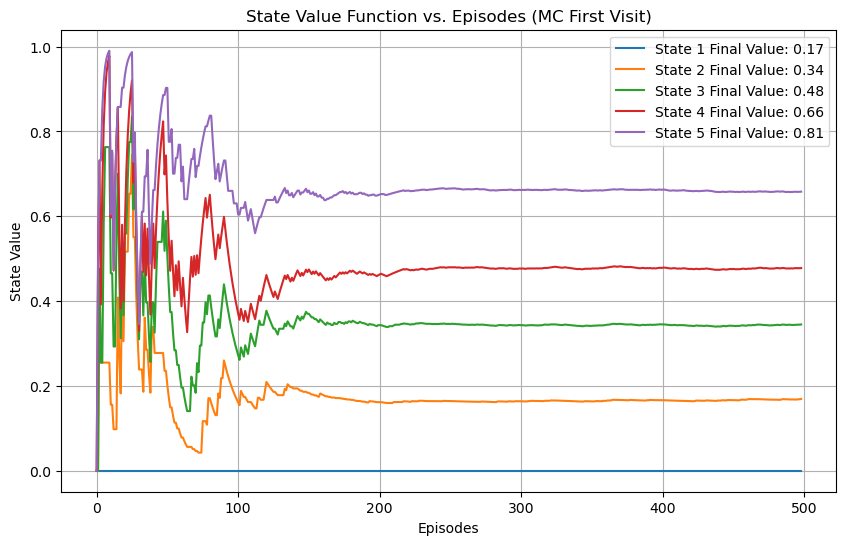

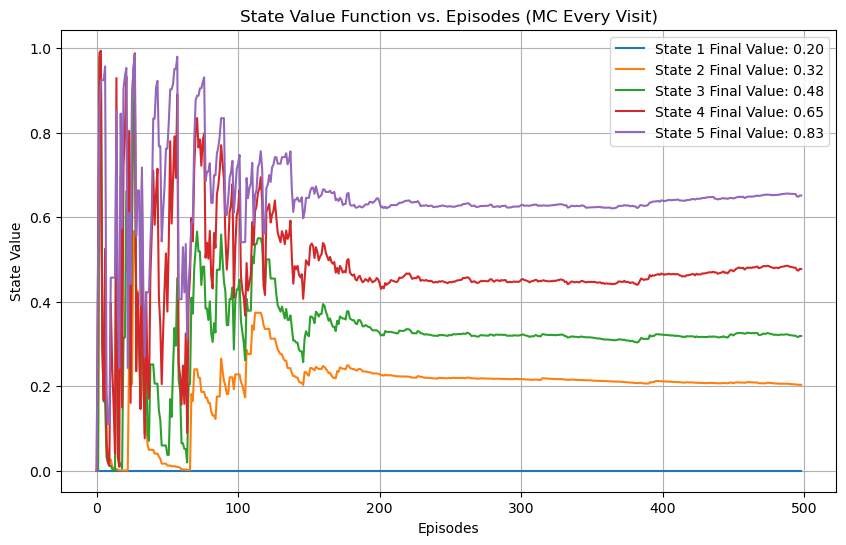

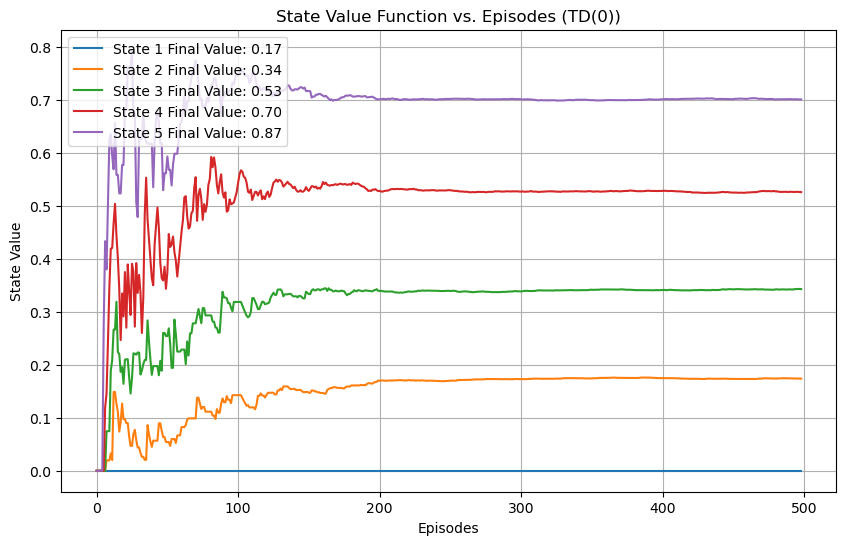

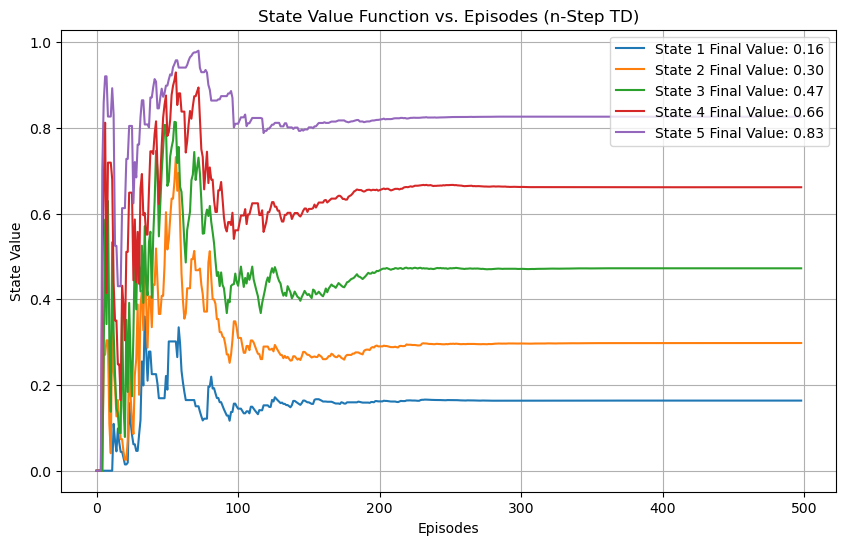

In [11]:
# Compare the methods with separate figures
compare_methods_separate_figures(env, methods, method_names, episodes=499)

### Visualisasi dalam log scale

In [13]:
# Define a function to compute and display results for all methods in separate figures
def compare_methods_separate_log_figures(env, methods, method_names:list[str], episodes:int = 500):
    for method, name in zip(methods, method_names):
        # Run the method
        final_values, V_history = method(env, episodes)

        # Create a new figure for each method
        plt.figure(figsize=(10, 6))
        for state in range(1, 6):  # Only states 1 to 5
            plt.plot([v[state - 1] for v in V_history], label=f'State {state} Final Value: {final_values[state]:.2f}')

        # Apply log scale to the x-axis
        plt.xscale('log')

        # Plot configuration
        plt.xlabel("Episodes (log scale)")
        plt.ylabel("State Value")
        plt.title(f"State Value Function vs. Episodes ({name})")
        plt.legend()
        plt.grid()
        plt.show()

In [ ]:
# Main script
env = RandomWalkEnv()
methods = [monte_carlo_first_visit(env=env, episodes=500), 
           monte_carlo_every_visit(env=env, episodes=500), 
           temporal_difference_learning(env=env, episodes=500), 
           n_step_td(env=env, episodes=500)
           ]

method_names = ["MC First Visit", "MC Every Visit", "TD(0)", "n-Step TD"]

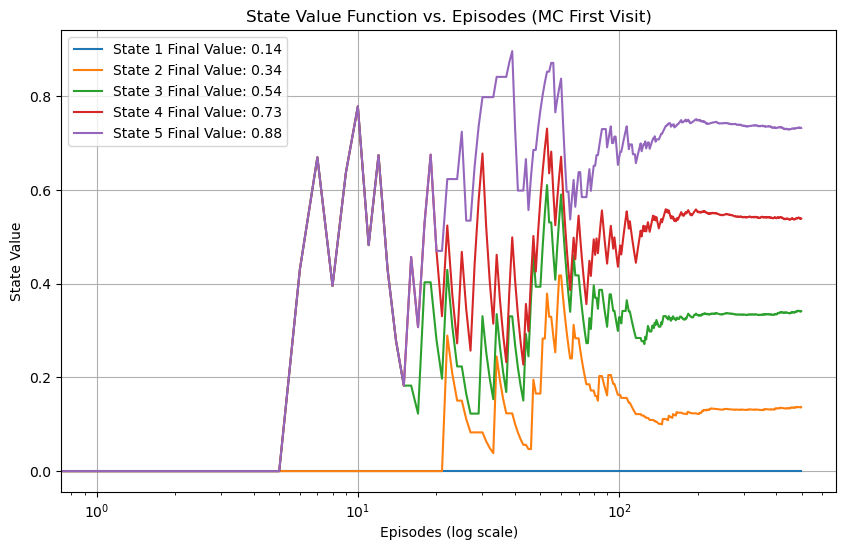

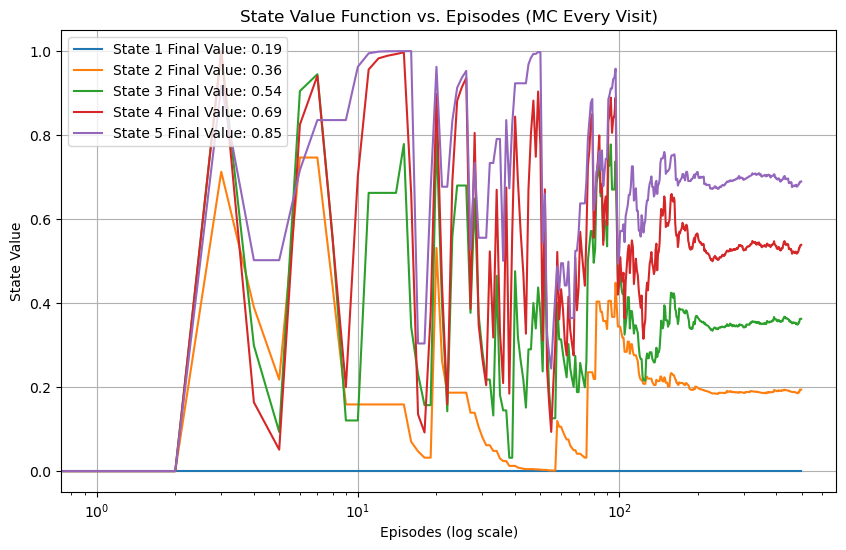

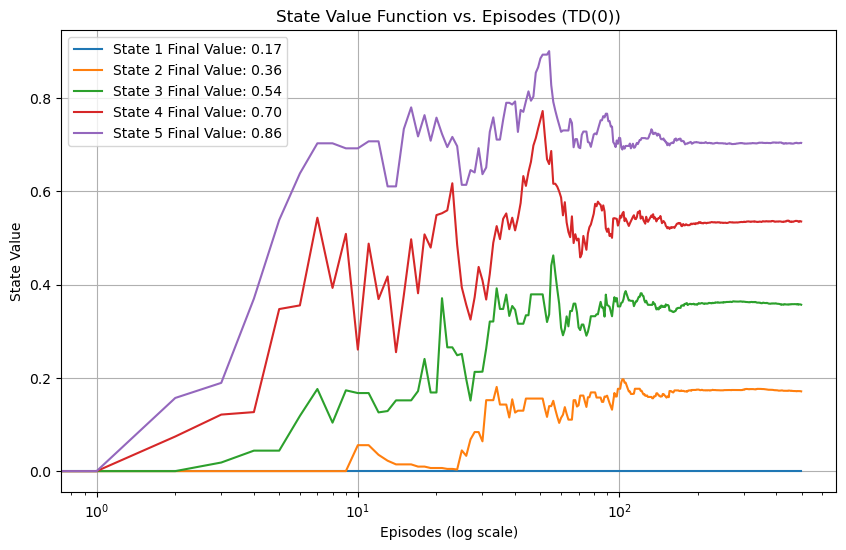

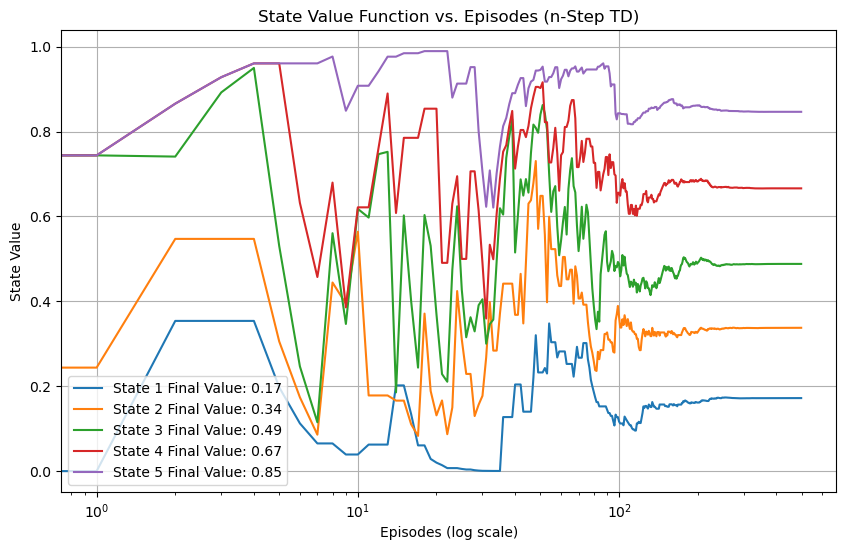

In [15]:

# Compare the methods with separate figures
compare_methods_separate_log_figures(env, methods, method_names, episodes=499)

# Analisis Hasil

## 1. MC First Visit
- **Fluktuasi Awal**:
  - Grafik menunjukkan fluktuasi besar pada awal episode (hingga sekitar 50 episode).
  - Algoritma hanya memperbarui fungsi nilai berdasarkan **kunjungan pertama** untuk setiap state dalam suatu episode, sehingga konvergensi lebih lambat.

- **Konvergensi**:
  - Stabilitas mulai terlihat setelah sekitar 100 episode.
  - Nilai konvergensi lambat karena pembaruan hanya dilakukan setelah episode selesai.

- **Akurasi**:
  - Hasil akhir konsisten dengan probabilitas mencapai terminal $ s = 6 $.
  - State $ V(5) $ memiliki nilai mendekati $ 0.9 $ (peluang tinggi mencapai terminal $ s = 6 $), sedangkan $ V(1) \approx 0.1 $.

---

## 2. MC Every Visit
- **Fluktuasi Awal**:
  - Fluktuasi awal lebih kecil dibandingkan MC First Visit karena fungsi nilai diperbarui pada **setiap kunjungan** dalam suatu episode.

- **Konvergensi**:
  - Nilai stabil setelah sekitar 50–100 episode.
  - Lebih cepat dibandingkan MC First Visit karena pembaruan lebih sering dilakukan dalam setiap episode.

- **Akurasi**:
  - Hasil akhir mirip dengan MC First Visit:
    - $ V(5) \approx 0.9 $, menunjukkan probabilitas tinggi mencapai terminal $ s = 6 $.
    - $ V(1) \approx 0.1 $, menunjukkan peluang rendah mencapai terminal $ s = 6 $.

---

## 3. TD(0)
- **Fluktuasi Awal**:
  - Fluktuasi jauh lebih kecil dibandingkan metode MC karena pembaruan fungsi nilai dilakukan **pada setiap langkah**.

- **Konvergensi**:
  - Konvergensi sangat cepat, hanya membutuhkan sekitar 20–50 episode.
  - Pembaruan nilai menggunakan estimasi fungsi nilai dari state berikutnya ($ V(S') $) membantu stabilitas pembelajaran.

- **Akurasi**:
  - Hasil akhir konsisten dengan metode MC, tetapi konvergensi terjadi jauh lebih cepat.

---

## 4. n-Step TD
- **Fluktuasi Awal**:
  - Fluktuasi awal lebih besar dibandingkan TD(0) tetapi lebih kecil dibandingkan MC.
  - Hal ini karena metode ini menggabungkan informasi dari $ n $-step ($ n = 3 $).

- **Konvergensi**:
  - Nilai stabil setelah sekitar 50 episode, lebih cepat dibandingkan MC tetapi sedikit lebih lambat dibandingkan TD(0).

- **Akurasi**:
  - Hasil akhir konsisten dengan probabilitas sebenarnya, menunjukkan pola yang serupa dengan TD(0) dan MC.

---

## Perbandingan Utama

| Metode              | Fluktuasi Awal       | Kecepatan Konvergensi       | Akurasi Nilai Akhir       |
|---------------------|----------------------|-----------------------------|---------------------------|
| **MC First Visit**  | Besar               | Lambat (~100 episode)      | Baik                      |
| **MC Every Visit**  | Sedang              | Lebih cepat (~50–100 episode) | Baik                      |
| **TD(0)**           | Kecil               | Sangat cepat (~20–50 episode) | Baik                      |
| **n-Step TD**       | Sedang              | Cepat (~50 episode)         | Baik                      |

---

## Kesimpulan
1. **Kecepatan Konvergensi**:
   - **TD(0)** adalah yang tercepat, diikuti oleh **n-Step TD**.
   - MC membutuhkan waktu lebih lama karena pembaruan dilakukan setelah episode selesai.

2. **Akurasi**:
   - Semua metode memberikan hasil akhir yang akurat sesuai dengan probabilitas mencapai terminal $ s = 6 $.

3. **Pemilihan Metode**:
   - **Jika kecepatan penting**: Gunakan **TD(0)** atau **n-Step TD**.
   - **Jika eksplorasi berbasis episode penuh diperlukan**: Gunakan **MC First Visit** atau **MC Every Visit**.

4. **Stabilitas**:
   - **TD(0)** dan **n-Step TD** menunjukkan stabilitas lebih baik karena pembaruan lebih sering dilakukan (per langkah).
